In [ ]:
import json
import numpy as np
import pandas as pd
import gensim
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from nltk import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv("sample_data/stock_data.csv")

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
train = train.loc[~train["Sentiment"].isnull(), :]
train = train.loc[~train["Text"].isnull(), :]

In [ ]:
train.shape

(4632, 2)

In [ ]:
train["Text"] = train["Text"].str.replace(r"[\W\d]+", " ").str.strip().str.lower()
test["Text"] = test["Text"].str.replace(r"[\W\d]+", " ").str.strip().str.lower()

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
train["Sentiment"] = train["Sentiment"].replace(-1, 0)
test["Sentiment"] = test["Sentiment"].replace(-1, 0)

In [ ]:
train["Text"].head()

4201    ove gnw calls are making me feel better about ...
387     csn option trader buys of the jan call spread ...
4385    people slag aap for cannibalization but samsun...
5773    sensex opens points lower at nifty starts day ...
2348    csod conf call ceo feeling good about our posi...
Name: Text, dtype: object

In [ ]:
pipe = Pipeline([
    ("vect", TfidfVectorizer()),
    ("model", LogisticRegression())
])

In [ ]:
train["Sentiment"] = train["Sentiment"].astype(np.uint8)

In [ ]:
pipe.fit(train["Text"], train["Sentiment"])

Pipeline(steps=[('vect',
                 TfidfVectorizer(binary=True, max_df=0.2, ngram_range=(1, 2),
                                 norm=False, smooth_idf=False,
                                 token_pattern='\\S+')),
                ('model',
                 LogisticRegression(C=1, l1_ratio=0.5, max_iter=5000,
                                    penalty='elasticnet', solver='saga'))])

In [ ]:
predict_proba = pipe.predict_proba(test["Text"])[:, 1]

In [ ]:
accuracy_score(test["Sentiment"], predict_proba > 0.5)

0.7929249352890423

In [ ]:
weights = pipe.named_steps['model'].coef_[0]
sorted_idx = np.argsort(np.abs(weights))[::-1][:50]
weights_best = weights[sorted_idx]
features = pipe.named_steps['vect'].get_feature_names()
features_best = np.array(features)[sorted_idx]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


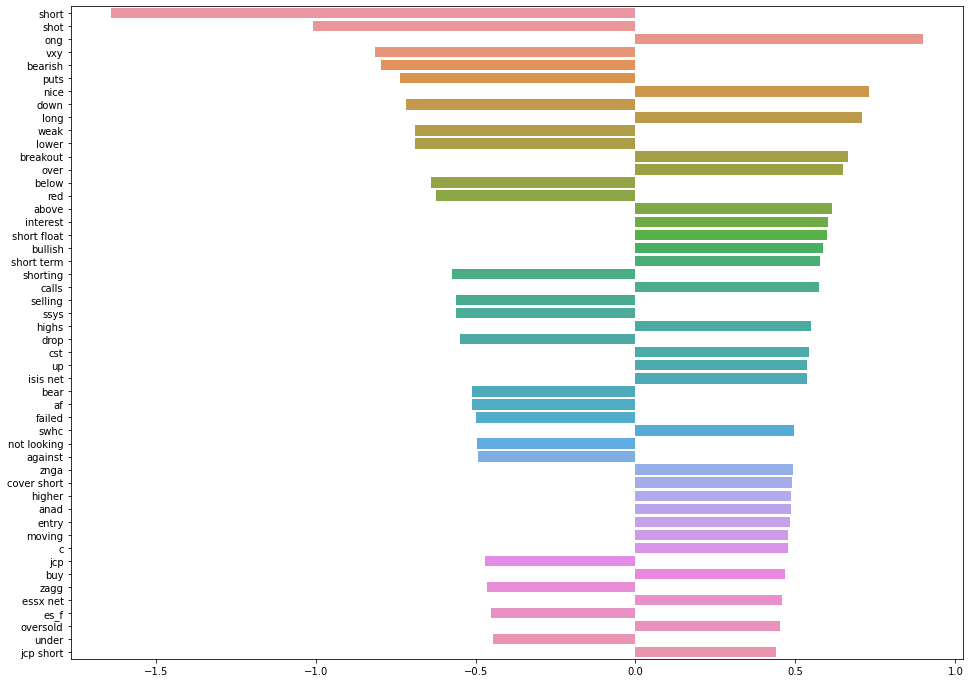

In [ ]:
plt.figure(figsize=(16, 12))
sns.barplot(weights_best, features_best)